In [1]:
import random
import time
import matplotlib.pyplot as plt

# Part (a)
Implement the above hybrid algorithm

In [3]:
def merge(arr1, arr2, key_comparisons):
    key_comp = 0
    merged = []
    i, j = 0, 0
    while i < len(arr1) and j < len(arr2):
        key_comparisons+=1
        key_comp+=1
        # print("Merging: ", arr1, arr2, "Comparison: ", key_comp)
        if arr1[i] < arr2[j]:
            merged.append(arr1[i])
            i += 1
        else:
            merged.append(arr2[j])
            j += 1
    merged += arr1[i:]
    merged += arr2[j:]
    return merged, key_comparisons

def insertionSort(arr, key_comparisons):
    key_comp = 0
    for i in range(1, len(arr)): 
        key = arr[i] # the key we want to insert into the sorted array
        j = i-1 # j-1 contains the size of current sorted array
        # print("Insertion: ", arr)
        while (j >= 0):
            key_comparisons += 1
            key_comp+=1
            if arr[j] > key:
                arr[j + 1] = arr[j]
                j -= 1
            else:
                break
        arr[j + 1] = key
        # if j >= 0:  # We still need to count the final comparison when arr[j] <= key
        #     key_comparisons += 1
        #     key_comp+=1
        # print("Insertion key comp: ", key_comp)
    return arr, key_comparisons


def hybridSort(arr, threshold, key_comparisons):
    if len(arr) <= 1:
        return arr, key_comparisons
    if (len(arr) <= threshold):
        return insertionSort(arr, key_comparisons)
    mid = len(arr) // 2
    left, key_comparisons = hybridSort(arr[0:mid], threshold, key_comparisons)
    right, key_comparisons = hybridSort(arr[mid:], threshold, key_comparisons)
    return merge(left, right, key_comparisons) # merge will add the key comparisons up

In [6]:
# Trouble shoot insertion sort
# arr_test = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
# arr_sorted, key_com = insertionSort(arr_test, 0)
# print(arr_sorted, key_com)
# 9 + 8 + 7 + 6 + 5 + 4 + 3 + 2 + 1 = 45

Insertion:  [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
Insertion key comp:  1
Insertion:  [9, 10, 8, 7, 6, 5, 4, 3, 2, 1]
Insertion key comp:  3
Insertion:  [8, 9, 10, 7, 6, 5, 4, 3, 2, 1]
Insertion key comp:  6
Insertion:  [7, 8, 9, 10, 6, 5, 4, 3, 2, 1]
Insertion key comp:  10
Insertion:  [6, 7, 8, 9, 10, 5, 4, 3, 2, 1]
Insertion key comp:  15
Insertion:  [5, 6, 7, 8, 9, 10, 4, 3, 2, 1]
Insertion key comp:  21
Insertion:  [4, 5, 6, 7, 8, 9, 10, 3, 2, 1]
Insertion key comp:  28
Insertion:  [3, 4, 5, 6, 7, 8, 9, 10, 2, 1]
Insertion key comp:  36
Insertion:  [2, 3, 4, 5, 6, 7, 8, 9, 10, 1]
Insertion key comp:  45
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 45


In [49]:
# Troubleshoot hybridSort
# arr_sorted, key_com = hybridSort(arr_test, 2, 0)
# print(arr_sorted, key_com)
# [10,9] => 1, [8,7] => 1, [6,5] => 1, [4,3] => 1, [2,1] => 1
# 1 + 1 + 1 + 1 + 1 = 5
# [9,10] + [7,8] => 2, [5,6] + [3,4] => 2, [1,2] => 0
# 2 + 2 + 0 = 4
# [7,8,9,10] + [3,4,5,6] => 4
# 4
# [3,4,5,6,7,8,9,10] + [1,2] => 8
# 8
# 8 + 4 + 4 + 5 = 

# 2 + 2 + 1 + 2 + 2 + 2 + 1 + 2 + 5 = 19

Insertion:  [1, 2]
Insertion key comp:  1
Insertion:  [4, 5]
Insertion key comp:  1
Merging:  [3] [4, 5] Comparison:  1
Merging:  [1, 2] [3, 4, 5] Comparison:  1
Merging:  [1, 2] [3, 4, 5] Comparison:  2
Insertion:  [6, 7]
Insertion key comp:  1
Insertion:  [9, 10]
Insertion key comp:  1
Merging:  [8] [9, 10] Comparison:  1
Merging:  [6, 7] [8, 9, 10] Comparison:  1
Merging:  [6, 7] [8, 9, 10] Comparison:  2
Merging:  [1, 2, 3, 4, 5] [6, 7, 8, 9, 10] Comparison:  1
Merging:  [1, 2, 3, 4, 5] [6, 7, 8, 9, 10] Comparison:  2
Merging:  [1, 2, 3, 4, 5] [6, 7, 8, 9, 10] Comparison:  3
Merging:  [1, 2, 3, 4, 5] [6, 7, 8, 9, 10] Comparison:  4
Merging:  [1, 2, 3, 4, 5] [6, 7, 8, 9, 10] Comparison:  5
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 15


# Part (b)
Generate arrays of increasing sizes, in a range from 1,000 to 10 million. For each of the sizes, generate a random dataset of integers in the range of [1, …, x], where x is the largest number you allow for your datasets.

In [4]:
import random
def generate_data(size, max_val, seed=42):
    random.seed(seed)
    return [random.randint(0, max_val) for _ in range(size)]

## Part C(i)
With the value of S fixed, plot the number of key comparisons over different sizes of the input list n. Compare your empirical results with your theoretical analysis of the time complexity

Comparisons mergeSort:  [8731, 120404, 1536542, 18673906, 220102479]
Comparisons hybridSort:  [8731, 120404, 1536542, 18673906, 220102479]


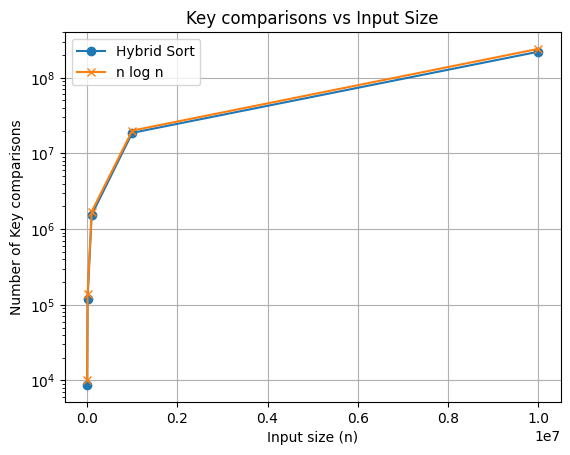

In [5]:
def mergeSort(arr, key_comparisons): # temporary
    if len(arr) <= 1:
        return arr, key_comparisons
    mid = len(arr) // 2
    left, key_comparisons = mergeSort(arr[0:mid], key_comparisons)
    right, key_comparisons = mergeSort(arr[mid:], key_comparisons)
    return merge(left, right, key_comparisons)

def s_fixed(threshold):
    sizes = [1000, 10000, 100000, 1000000, 10000000]
    max_val = int(input("Enter the maximum value for the array: "))
    # threshold = int(input("Enter the threshold value: "))
    key_comparisons_mergeSort = 0
    key_comparisons_hybridSort = 0
    comparisons_mergeSort = []
    comparisons_hybridSort = []
    # arr = [12, 11, 13, 5, 6, 7]
    for size in sizes:
        key_comparisons_mergeSort = 0 # reset the key comparisons
        key_comparisons_hybridSort = 0 # reset the key comparisons
        arr = generate_data(size, max_val)
        
        arr_copy = arr.copy()
        start_time = time.time()
        _ , key_comparisons_hybridSort = hybridSort(arr_copy, threshold,0)
        
        elapsed_time = time.time() - start_time
        comparisons_hybridSort.append(key_comparisons_hybridSort)

        arr_copy = arr.copy()
        _, key_comparisons_mergeSort  = mergeSort(arr_copy, 0)
        comparisons_mergeSort.append(key_comparisons_mergeSort)
    print("Comparisons mergeSort: ", comparisons_mergeSort)
    print("Comparisons hybridSort: ", comparisons_hybridSort)

    n_log_n = [size * (size).bit_length() for size in sizes] # approximately n log n
    # plt.plot(sizes, comparisons_mergeSort, label="Merge Sort", marker = 'x')
    plt.plot(sizes, comparisons_hybridSort, label="Hybrid Sort", marker = 'o')
    plt.plot(sizes, n_log_n, label="n log n", marker = 'x')
    plt.xlabel('Input size (n)')
    plt.ylabel('Number of Key comparisons')
    plt.title('Key comparisons vs Input Size')
    plt.legend()
    # plt.xscale('log')
    plt.yscale('log')
    plt.grid(True)
    plt.show()


s_fixed(2)
# n_fixed(100000)

## Part C(i)
With the value of S fixed, plot the number of key comparisons over different sizes of the input list n. Compare your empirical results with your theoretical analysis of the time complexity

# Part C (ii)
With the input size n fixed, plot the number of key comparisons over different values of S. Compare your empirical results with your theoretical analysis of the time complexity.

Comparisons hybridSort:  [18674388, 18728444, 19072321, 19072321, 19072321, 20224577, 20224577, 20224577, 23187967, 29903983, 44220911]


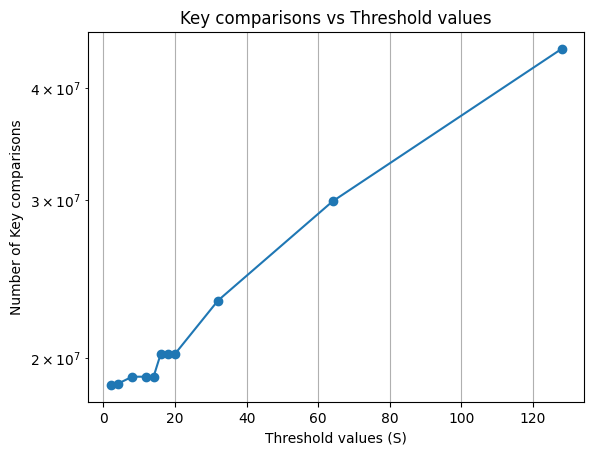

In [6]:
def n_fixed(arr, n):
    # max_val = int(input("Enter the maximum value for the array: "))
    # max_val = 1000000
    key_comparisons_hybridSort = 0
    comparisons_hybridSort = []
    # arr = generate_data(n, max_val)
    thresholds = [2, 4, 8, 12, 14, 16, 18, 20, 32, 64, 128]
    for threshold in thresholds:
        arr_copy = arr.copy()
        start_time = time.time()
        _, key_comparisons_hybridSort = hybridSort(arr_copy, threshold, 0)
        elapsed_time = time.time() - start_time
        comparisons_hybridSort.append(key_comparisons_hybridSort)
    print("Comparisons hybridSort: ", comparisons_hybridSort)
    plt.plot(thresholds, comparisons_hybridSort, label="Hybrid Sort", marker = 'o')
    plt.xlabel('Threshold values (S)')
    plt.ylabel('Number of Key comparisons')
    plt.title('Key comparisons vs Threshold values')
    plt.yscale('log')
    plt.grid(True)
    plt.show()

arr = generate_data(1000000, 1000000)
n_fixed(arr, 1000000)

# Part C (iii)
Using different sizes of input datasets, study how to determine an optimal value of S for the best performance of this hybrid algorithm.

Threshold: 2, Time: 6.176323 seconds
Threshold: 4, Time: 5.562028 seconds
Threshold: 8, Time: 5.463783 seconds
Threshold: 12, Time: 6.304799 seconds
Threshold: 14, Time: 5.414661 seconds
Threshold: 16, Time: 7.107164 seconds
Threshold: 18, Time: 6.315159 seconds
Threshold: 20, Time: 6.203893 seconds
Threshold: 32, Time: 6.840583 seconds
Threshold: 64, Time: 8.315646 seconds
Threshold: 128, Time: 9.976565 seconds


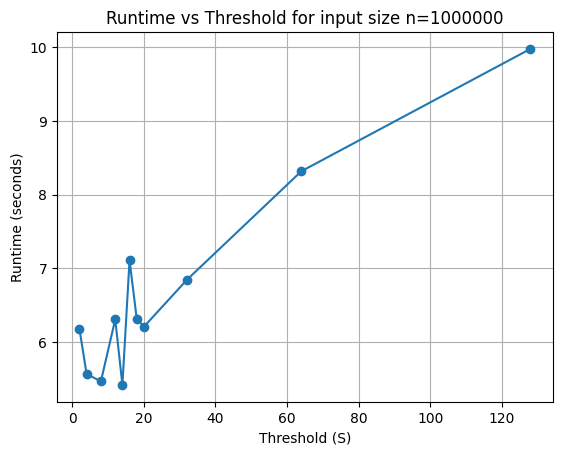

In [15]:
def n_fixed_for_runtime(arr, n):
    # max_val = int(input("Enter the maximum value for the array: "))
    max_val = 1000000
    runtimes_hybridSort = []
    arr = generate_data(n, max_val)
    thresholds = [2, 4, 8, 12, 14, 16, 18, 20, 32, 64, 128]
    for threshold in thresholds:
        arr_copy = arr.copy()
        start_time = time.time()
        _, key_comparisons_hybridSort = hybridSort(arr_copy, threshold, 0)
        elapsed_time = time.time() - start_time
        runtimes_hybridSort.append(elapsed_time)
        print(f"Threshold: {threshold}, Time: {elapsed_time:.6f} seconds")
    plt.plot(thresholds, runtimes_hybridSort, label="Hybrid Sort", marker='o')
    plt.xlabel('Threshold (S)')
    plt.ylabel('Runtime (seconds)')
    plt.title(f'Runtime vs Threshold for input size n={n}')
    plt.grid(True)
    plt.show()
n_fixed_for_runtime(arr, 1000000)

# Part (d)
Implement the original version of Mergesort (as learnt in lecture). Compare its performance against the above hybrid algorithm in terms of the number of key comparisons and CPU times on the dataset with 10 million integers. You can use the optimal value of S obtained in (c) for this task.

In [7]:
n = 10000000
S = 8
def merge(arr1, arr2, key_comparisons):
    merged = []
    i, j = 0, 0
    while i < len(arr1) and j < len(arr2):
        key_comparisons+=1
        if arr1[i] < arr2[j]:
            merged.append(arr1[i])
            i += 1
        else:
            merged.append(arr2[j])
            j += 1
    merged += arr1[i:]
    merged += arr2[j:]
    return merged, key_comparisons

def mergeSort(arr, key_comparisons):
    if len(arr) <= 1:
        return arr, key_comparisons
    mid = len(arr) // 2
    left, key_comparisons = mergeSort(arr[0:mid], key_comparisons)
    right, key_comparisons = mergeSort(arr[mid:], key_comparisons)
    return merge(left, right, key_comparisons)

def compare_mergeSort_and_hybridSort(n, threshold):
    # max_val = int(input("Enter the maximum value for the array: "))
    max_val = n
    # threshold = int(input("Enter the threshold value: "))
    key_comparisons_mergeSort = 0
    key_comparisons_hybridSort = 0
    hybridSort_runtime = 0
    mergeSort_runtime = 0
    arr = generate_data(n, max_val)
    
    arr_copy = arr.copy()
    start_time = time.time()
    _ , key_comparisons_hybridSort = hybridSort(arr_copy, threshold,0)
    hybridSort_runtime = time.time() - start_time
    
    arr_copy = arr.copy()
    start_time = time.time()
    _, key_comparisons_mergeSort  = mergeSort(arr_copy, 0)
    mergeSort_runtime = time.time() - start_time
    print(f"Comparisons mergeSort for n={n}: ", key_comparisons_mergeSort)
    print(f"Comparisons hybridSort n={n}: ", key_comparisons_hybridSort)

    print(f"Runtime mergeSort for n={n}: ", mergeSort_runtime)
    print(f"Runtime hybridSort for n={n}: ", hybridSort_runtime)

compare_mergeSort_and_hybridSort(n, S)

Comparisons mergeSort for n=10000000:  220102479
Comparisons hybridSort n=10000000:  221111659
Runtime mergeSort for n=10000000:  83.55215978622437
Runtime hybridSort for n=10000000:  123.02393507957458
